In [71]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [72]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [73]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
train.shape

(1460, 81)

In [75]:
test.shape

(1459, 80)

In [76]:
train.drop(['Id'],axis=1,inplace=True)

In [77]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [78]:
for feature in train.columns:
    if train[feature].isnull().sum()>0:
        print(feature)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [83]:
nullColumns = [feature for feature in train.columns if train[feature].isnull().sum()>0]
nullColumns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [84]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [85]:
train.shape[0]

1460

In [86]:
train_null =  train.isnull().sum()
train_null_percentage = train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],4))
train_null_new = pd.DataFrame([train_null,train_null_percentage]).T
train_null_new.columns = ['NullValues','NullPer']
train_null_new.sort_values(by='NullValues',ascending=False,inplace=True)
train_null_new.reset_index(inplace=True)
train_null_new.head(20)

,index,NullValues,NullPer
0,PoolQC,1453.0,99.5205
1,MiscFeature,1406.0,96.3014
2,Alley,1369.0,93.7671
3,Fence,1179.0,80.7534
4,FireplaceQu,690.0,47.2603
5,LotFrontage,259.0,17.7397
6,GarageYrBlt,81.0,5.5479
7,GarageCond,81.0,5.5479
8,GarageType,81.0,5.5479
9,GarageFinish,81.0,5.5479


In [87]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [88]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [89]:
train_null= train.isnull().sum()
train_null_percentage = train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],4))
train_null_new=pd.DataFrame([train_null,train_null_percentage]).T
train_null_new.columns=['NullValues','NullPer']
train_null_new.sort_values(by='NullValues',ascending=False,inplace=True)
train_null_new.reset_index(inplace=True)
train_null_new.head(20)

,index,NullValues,NullPer
0,LotFrontage,259.0,17.7397
1,GarageType,81.0,5.5479
2,GarageYrBlt,81.0,5.5479
3,GarageFinish,81.0,5.5479
4,GarageQual,81.0,5.5479
5,GarageCond,81.0,5.5479
6,BsmtFinType2,38.0,2.6027
7,BsmtExposure,38.0,2.6027
8,BsmtQual,37.0,2.5342
9,BsmtCond,37.0,2.5342


In [90]:
train_null_new[:14]['index']

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [91]:
nullColumns = np.array(train_null_new[:14]['index'])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [93]:
train["GarageYrBlt"].dtype

dtype('float64')

In [94]:
for column in nullColumns:
    if train[column].dtype=="object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} this is numerical")
        train[column].fillna(train[column].median(),inplace=True)

LotFrontage this is numerical
GarageType
GarageYrBlt this is numerical
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtQual
BsmtCond
BsmtFinType1
MasVnrArea this is numerical
MasVnrType
Electrical


In [95]:
train_null= train.isnull().sum()
train_null_percentage = train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],4))
train_null_new=pd.DataFrame([train_null,train_null_percentage]).T
train_null_new.columns=['NullValues','NullPer']
train_null_new.sort_values(by='NullValues',ascending=False,inplace=True)
train_null_new.reset_index(inplace=True)
train_null_new.head(20)

,index,NullValues,NullPer
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [97]:
numericalColumns = train.select_dtypes(include=np.number).columns
numericalColumns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [99]:
ObjectColumns = train.select_dtypes(include=np.object).columns
ObjectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

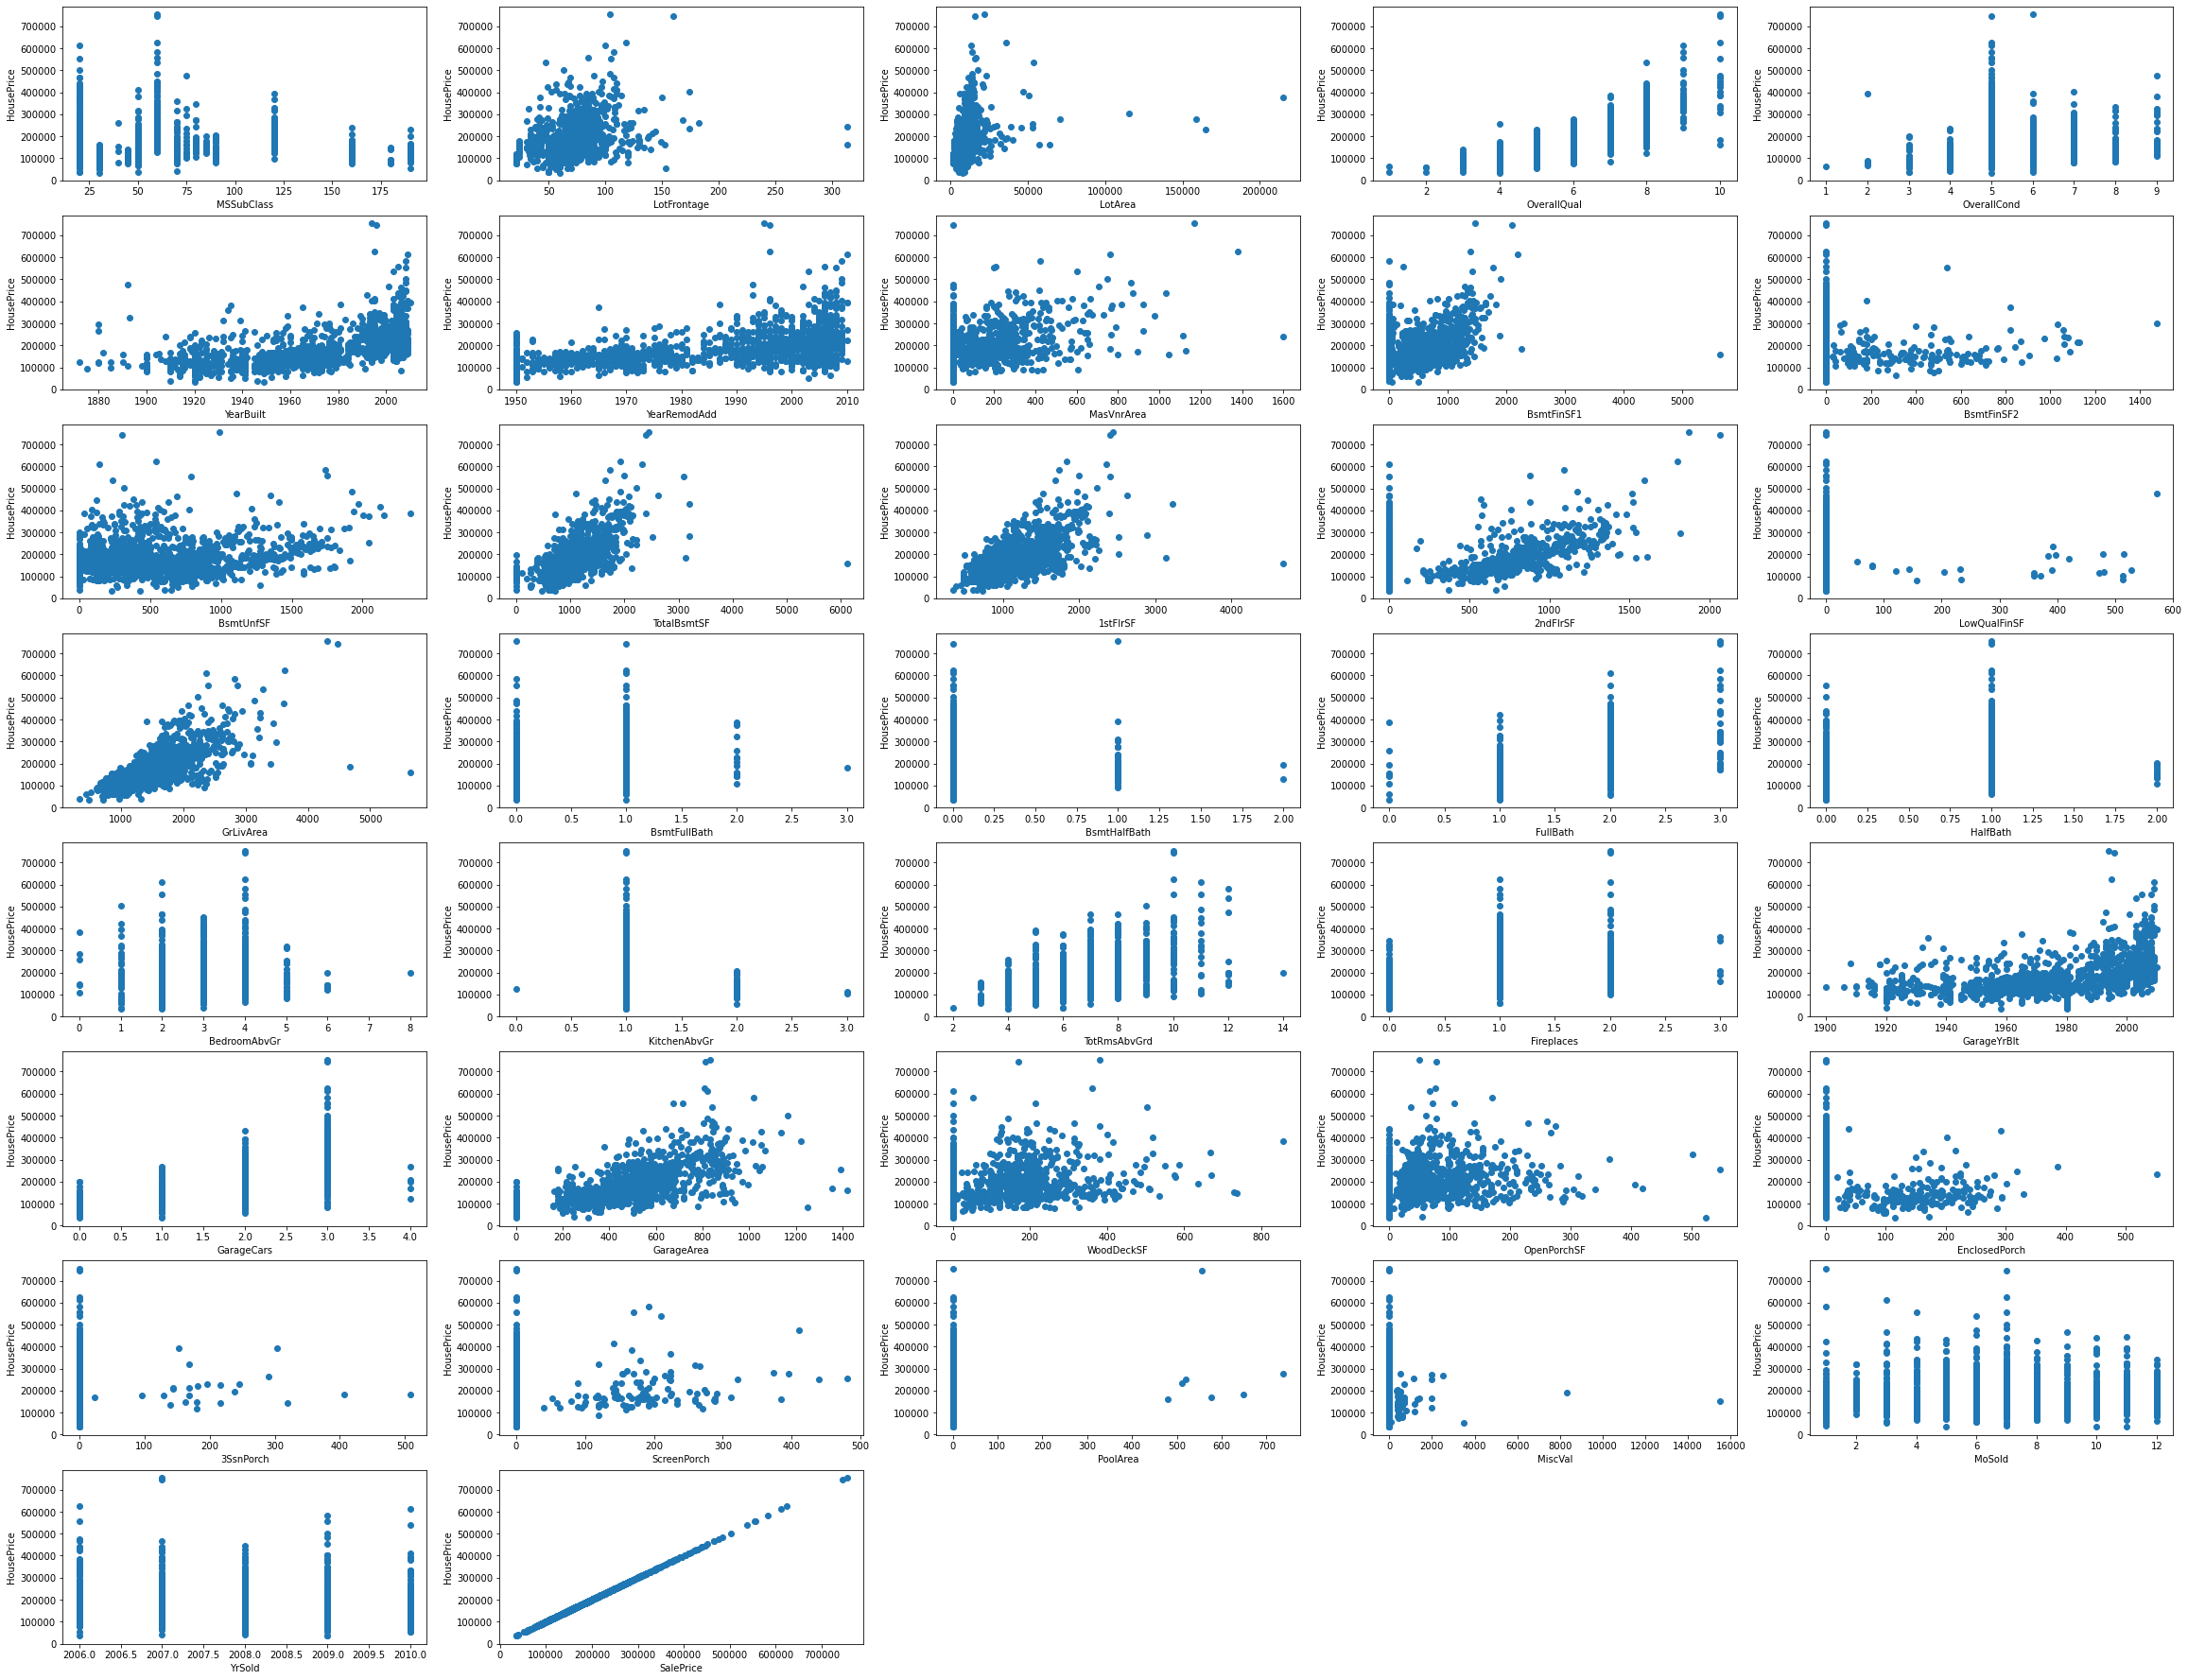

In [100]:
j=0
plt.figure(figsize=(40,40))
for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [101]:
train["MSSubClass"].nunique()

15

In [102]:
train["LotFrontage"].nunique()

110

In [103]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if train[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [104]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [105]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

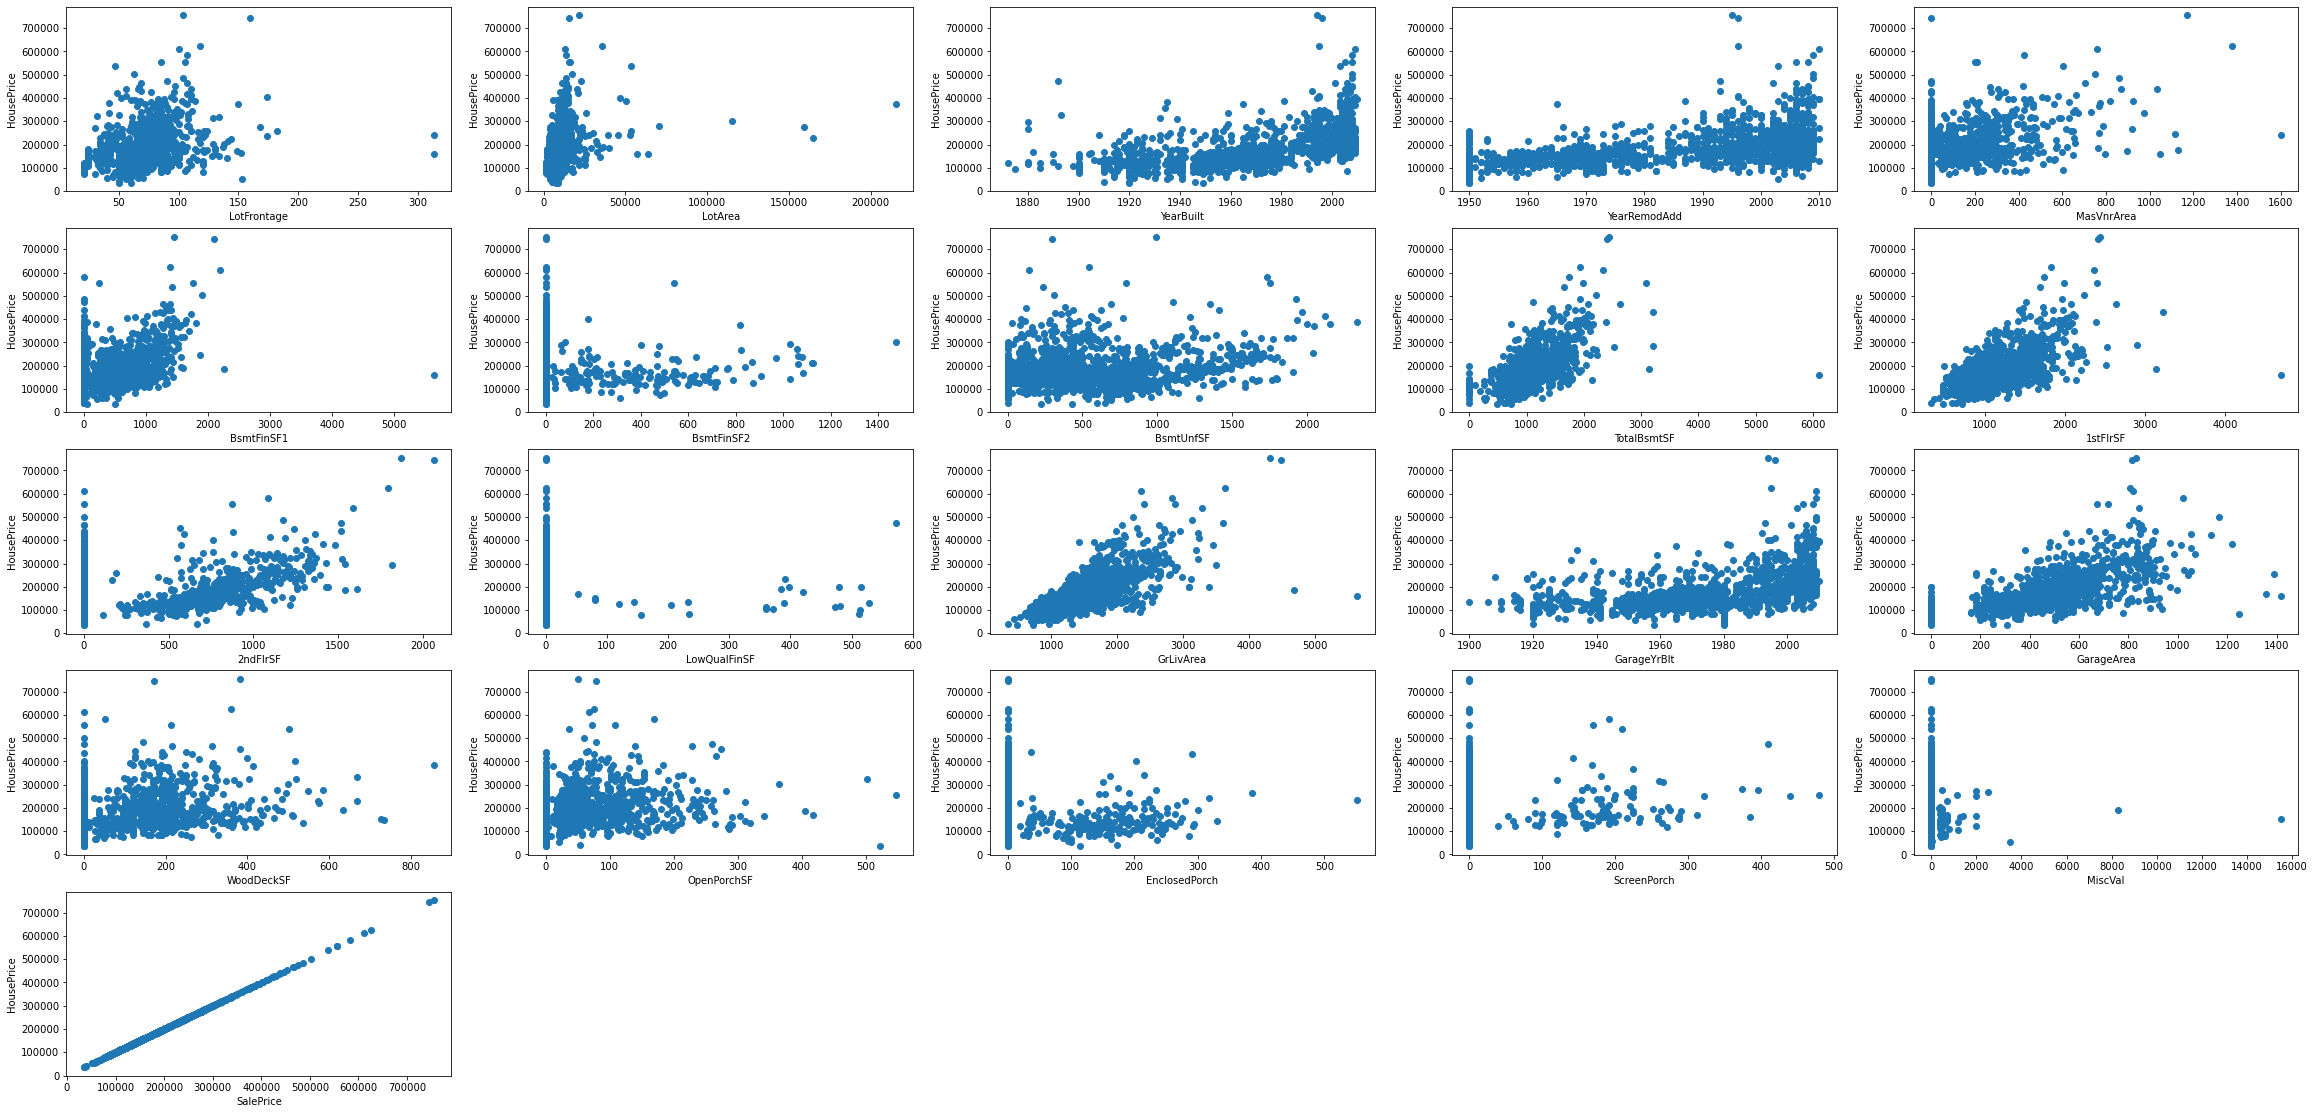

In [106]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [107]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

<BarContainer object of 10 artists>

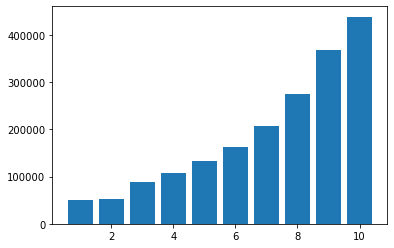

In [108]:
observationVal = train.groupby('OverallQual')['SalePrice'].mean()
observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
observationValDF.reset_index(inplace =True)
plt.bar(observationValDF['OverallQual'],observationValDF['SalePrice'])

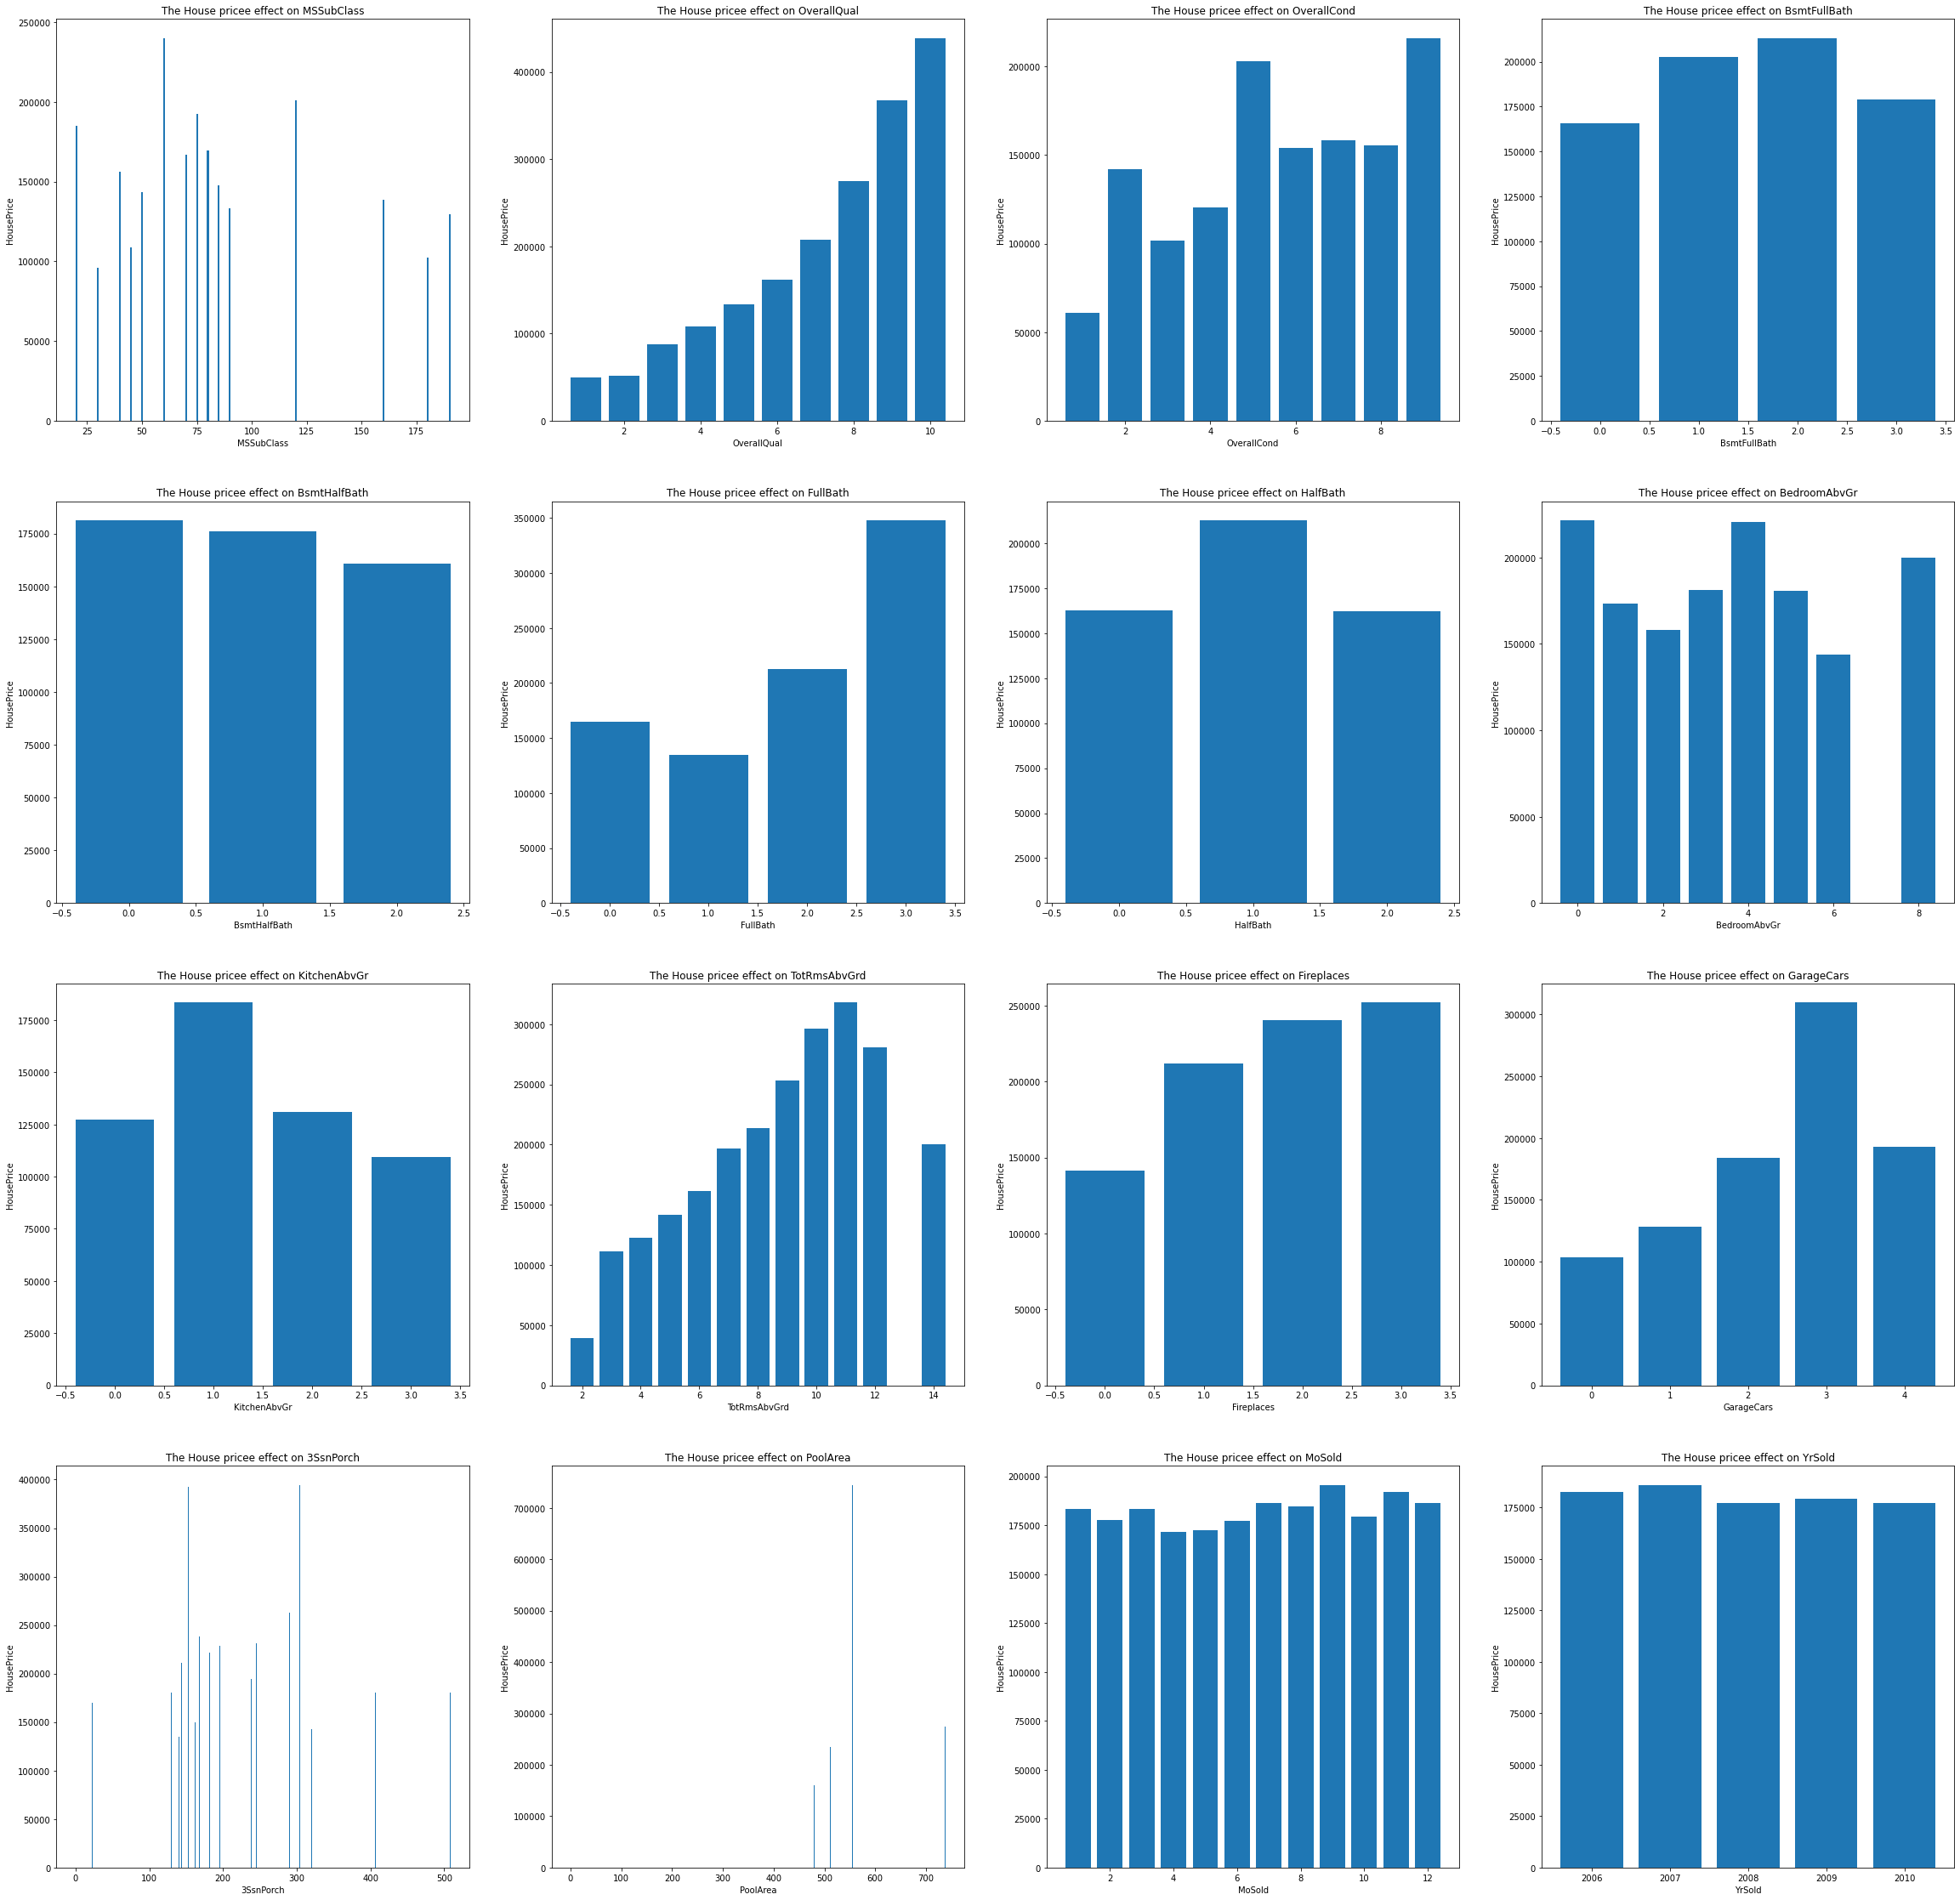

In [109]:
j=0
plt.figure(figsize=(40,40))
for column in descriateCols:
    plt.subplot(4,4,j+1)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The House pricee effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [110]:
len(ObjectColumns)

38

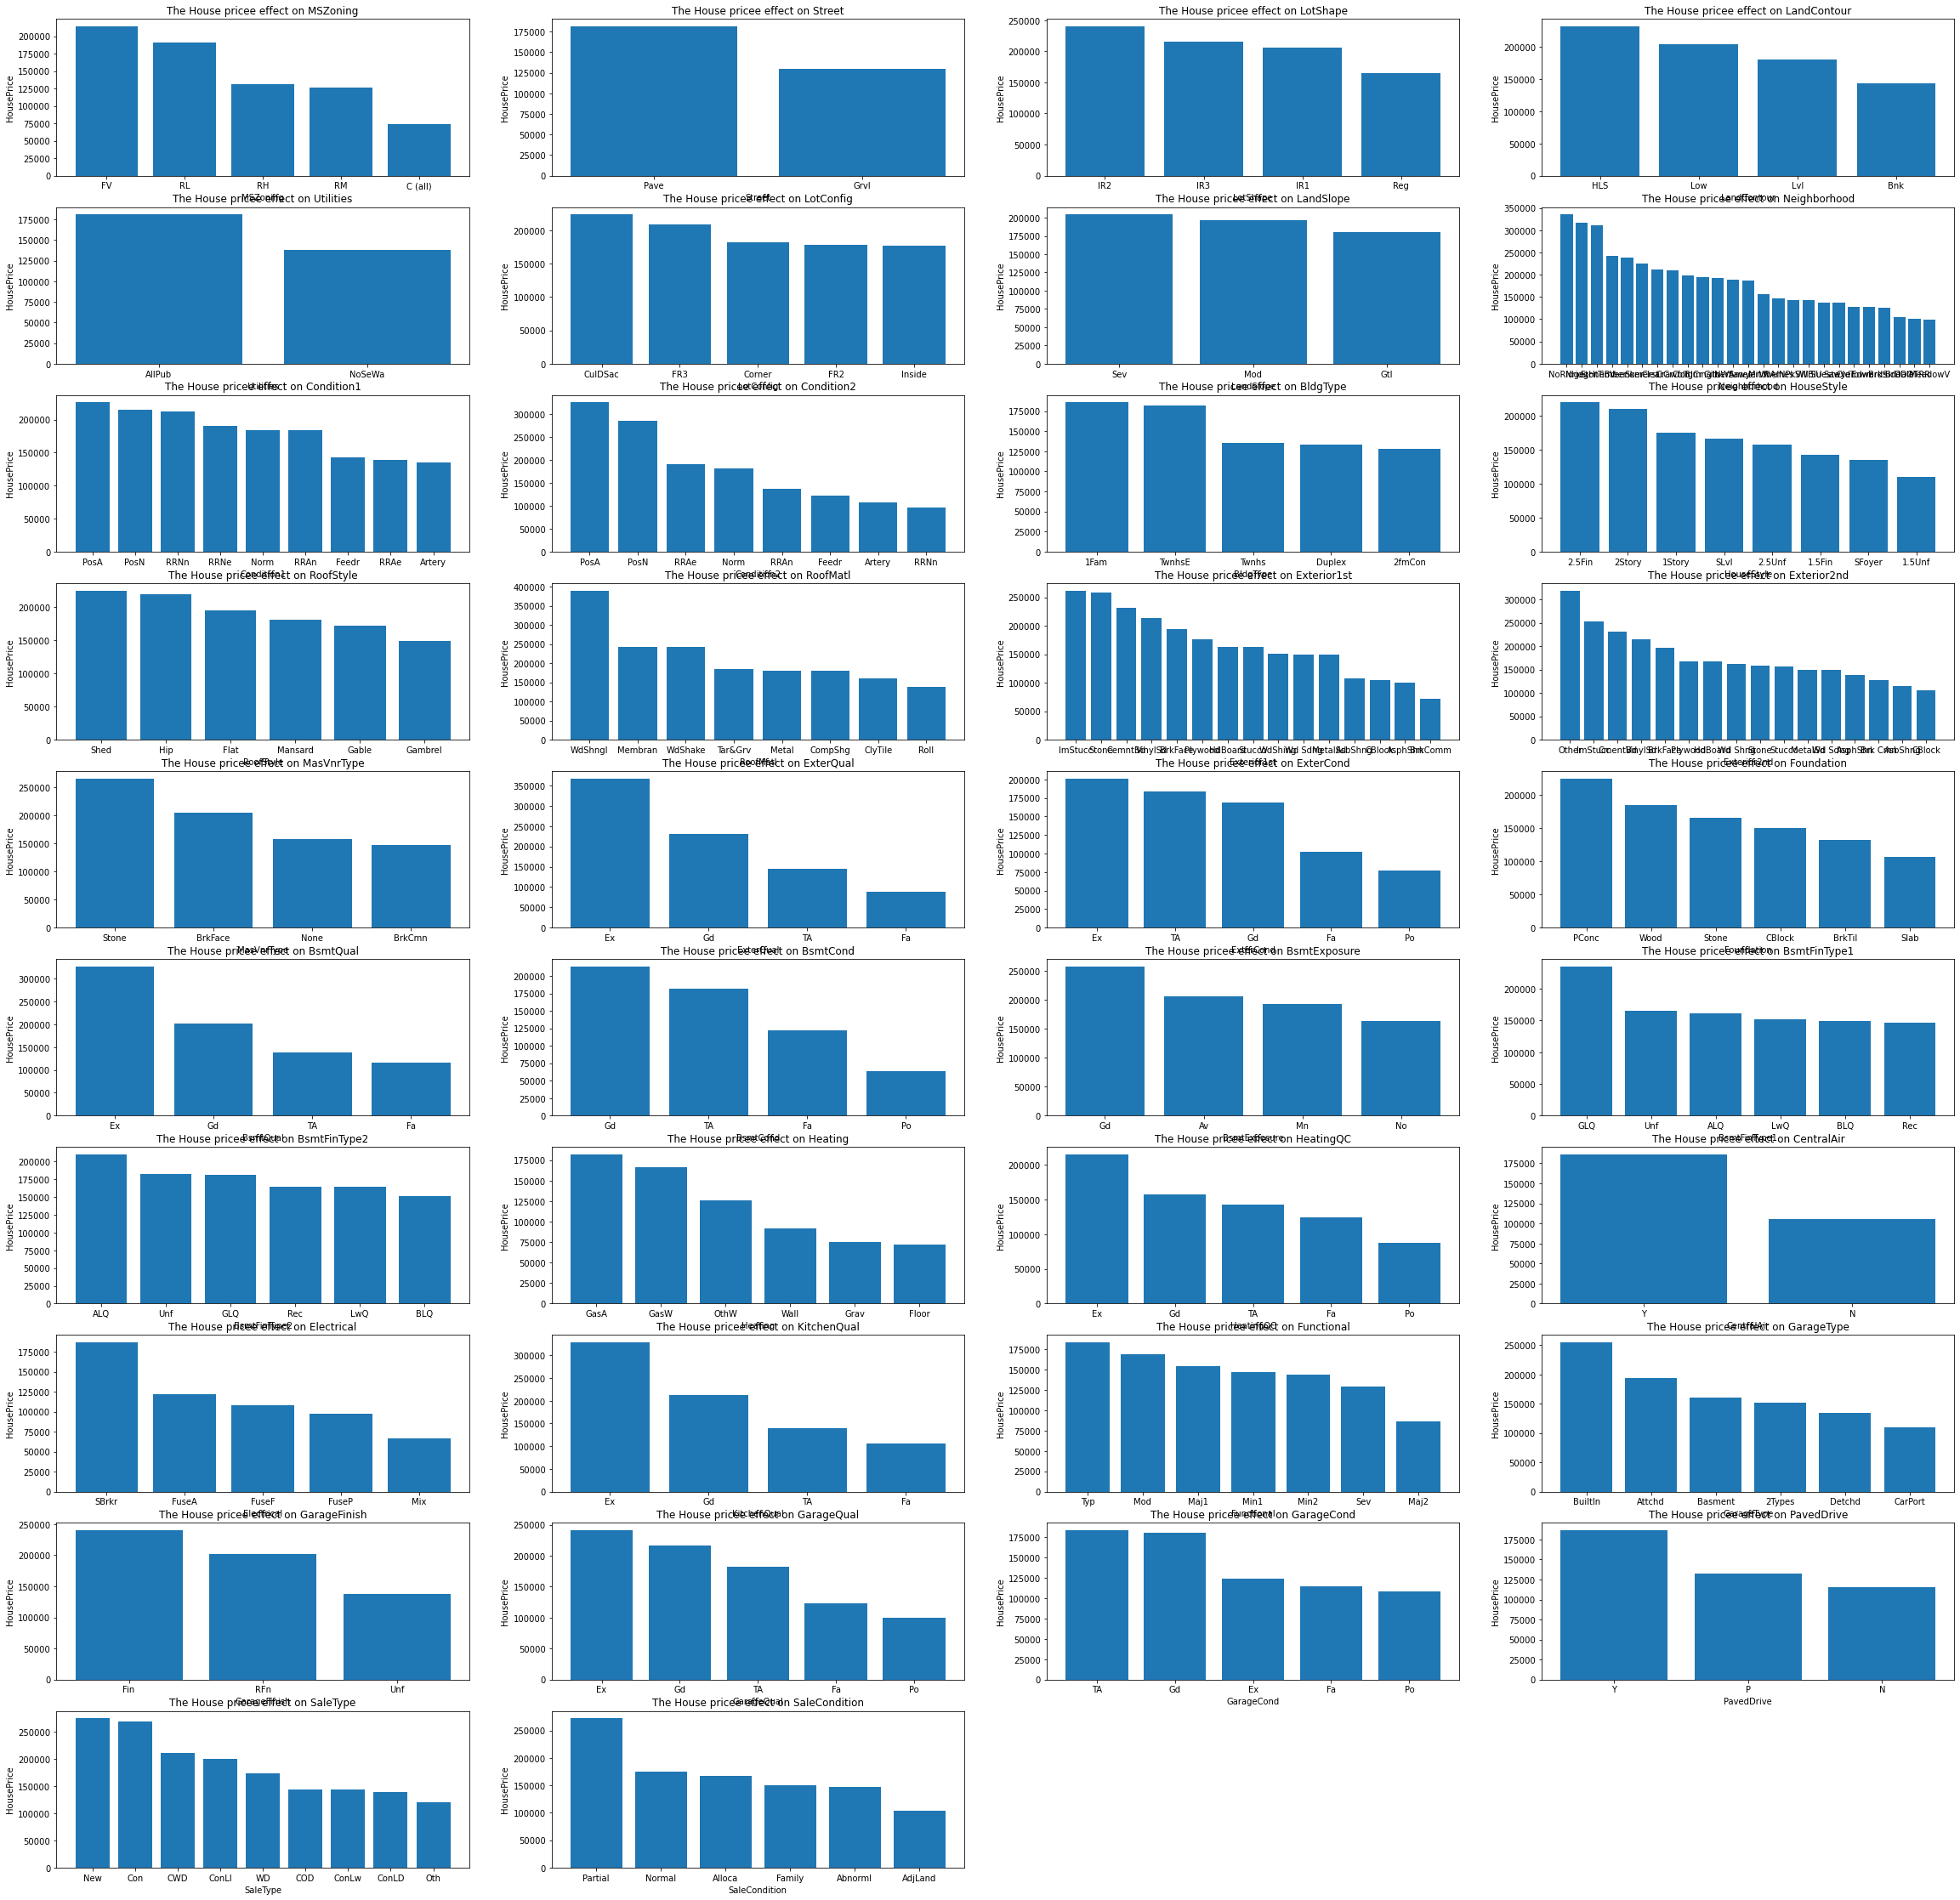

In [112]:

j=0
plt.figure(figsize=(40,40))
for column in ObjectColumns:
    plt.subplot(10,4,j+1)
    observationVal = train.groupby(column)['SalePrice'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'SalePrice',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['SalePrice'])
    plt.title(f"The House pricee effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [113]:
continuesCols


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [114]:
train.shape

(1460, 75)

In [115]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [120]:
upper_lim=train['LotFrontage'].mean()+train['LotFrontage'].std() *3
lower_lim=train['LotFrontage'].mean()-train['LotFrontage'].std() *3

train.loc[(train['LotFrontage'] >upper_lim),'LotFrontage'] = upper_lim
train.loc[(train['LotFrontage'] < lower_lim),'LotFrontage'] = lower_lim

In [121]:
lower_lim

11.732312901930456

In [122]:
train[(train['LotFrontage'] <= upper_lim) & (train['LotFrontage'] >= lower_lim) ]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


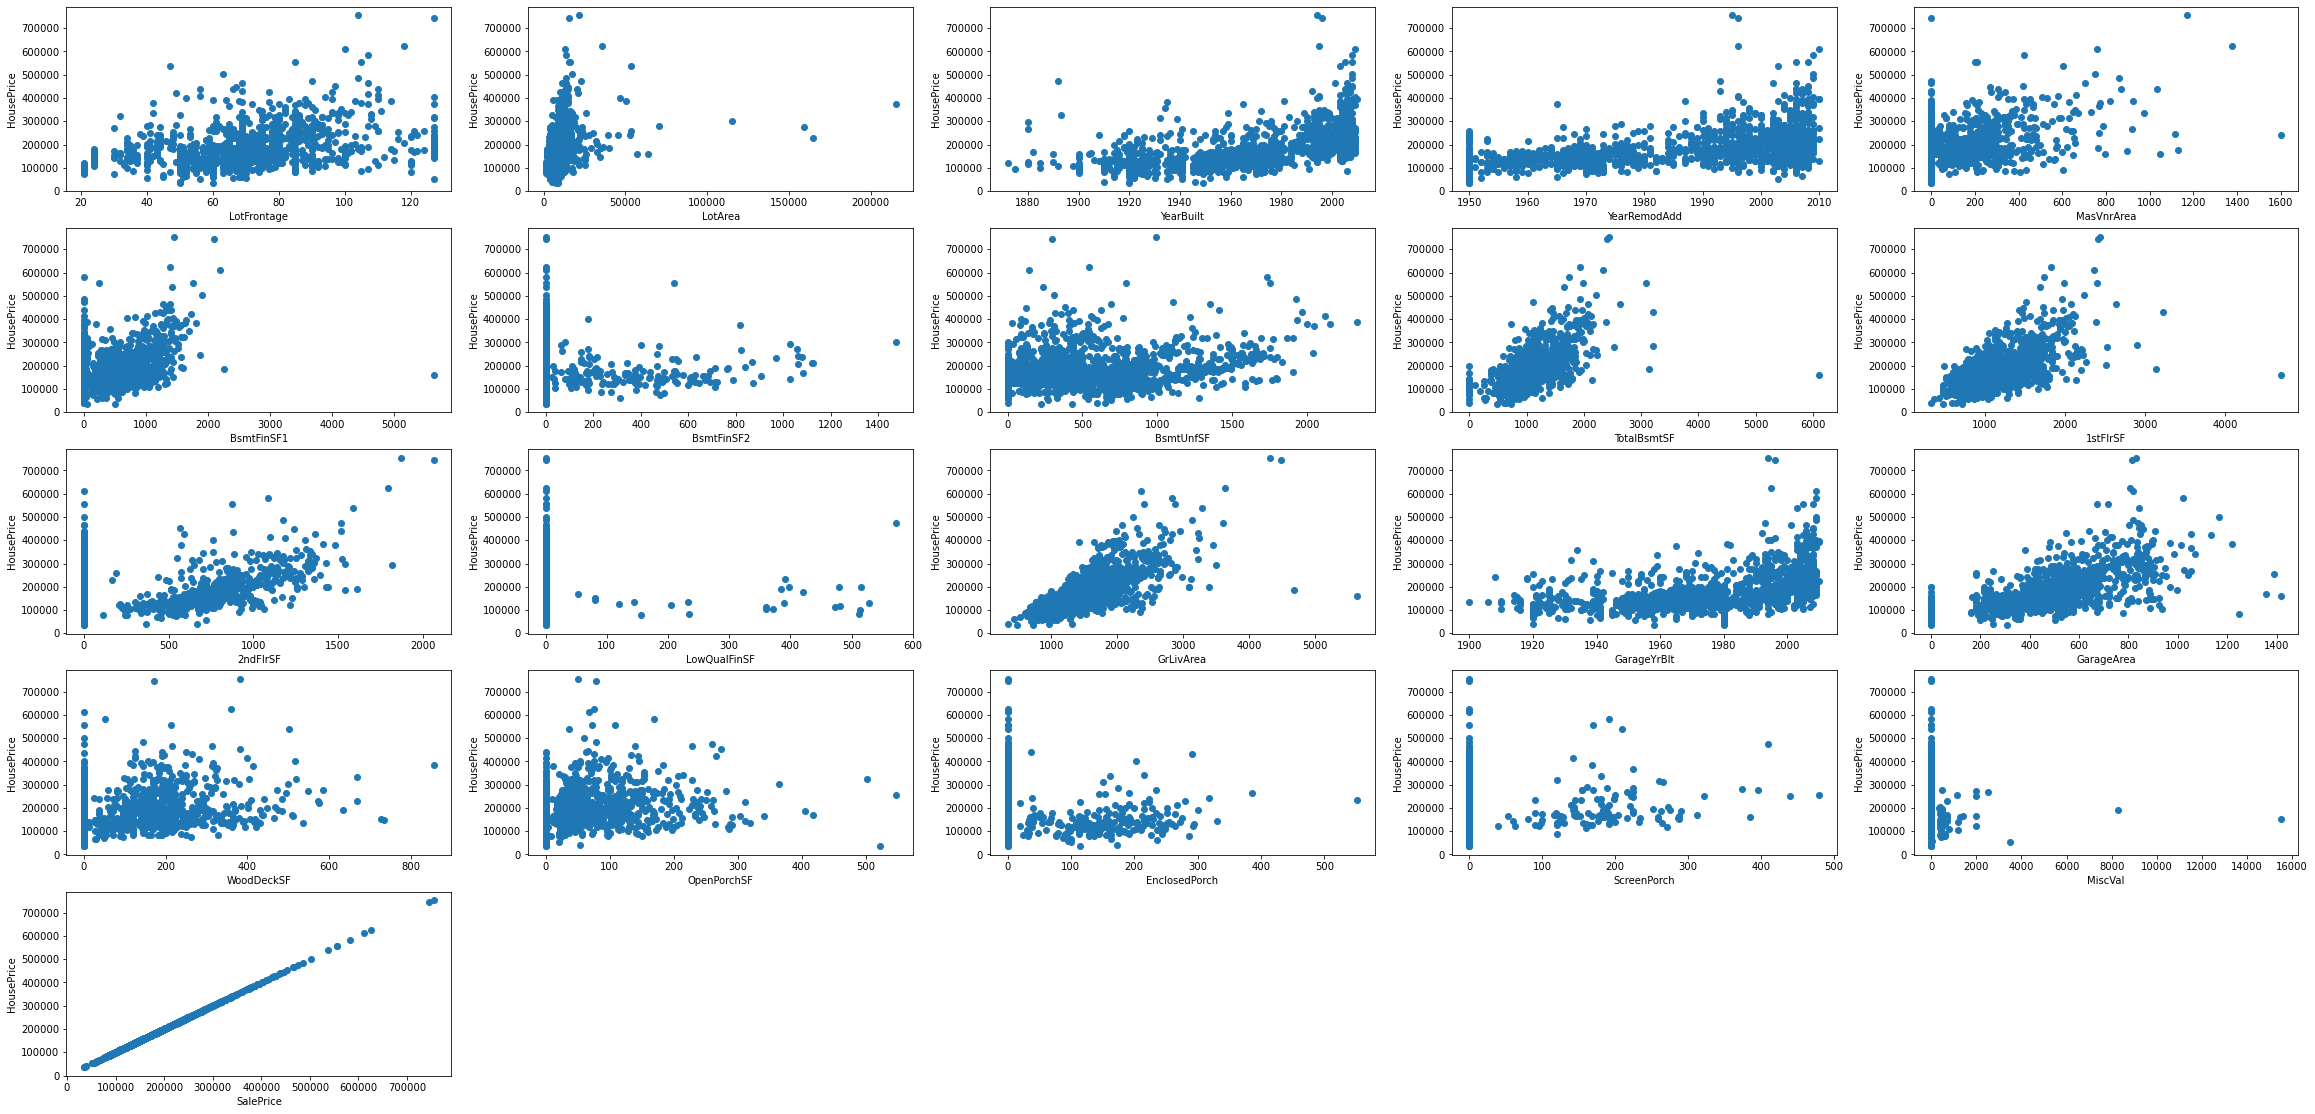

In [123]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j+=1

In [124]:
ObjectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [125]:
MSZoningLE=LabelEncoder()
MSZoningLE.fit_transform(train["MSZoning"])
StreetLE=LabelEncoder()
StreetLE.fit_transform(train["Street"])

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [127]:
trainObjectDF = train[ObjectColumns]
trainObjectDF 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [128]:
from collections import defaultdict
defaultEncoder= defaultdict(LabelEncoder)


# variable enconding
fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))



In [129]:
fittrainObjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [130]:
defaultEncoder['LotShape'].transform(["Reg"])

array([3])

In [131]:
ObjectColumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [132]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [133]:
fittrainObjectDF.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [135]:
train.drop(ObjectColumns,axis=1,inplace=True)

In [136]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [138]:
updatedTrain = pd.concat([train,fittrainObjectDF],axis=1)
updatedTrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,2,6,1,2,4,4,2,8,4


In [140]:
corrDF = updatedTrain.corr()
corrDF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.401412,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.401412,1.000000,0.276616,0.237669,-0.059148,0.126664,0.077058,0.185637,0.160579,0.048100,...,0.063575,-0.184967,0.030937,-0.237064,-0.222662,0.051380,0.043936,0.097988,-0.034010,0.066337
LotArea,-0.139781,0.276616,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.043856,-0.057018,-0.022317,-0.116799,-0.116326,0.017551,0.028106,0.015134,0.012292,0.034169
OverallQual,0.032628,0.237669,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059148,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageQual,0.007630,0.051380,0.017551,0.090562,-0.094761,0.303839,0.130241,0.105904,0.122935,0.044856,...,0.109257,-0.014551,0.021339,-0.219632,-0.153777,1.000000,0.511375,0.167494,-0.029036,0.046204
GarageCond,0.002927,0.043936,0.028106,0.144988,-0.032236,0.246576,0.150579,0.067709,0.097105,0.002138,...,0.119467,-0.068412,0.021204,-0.220106,-0.130269,0.511375,1.000000,0.187769,-0.016684,0.018784
PavedDrive,-0.059925,0.097988,0.015134,0.229393,-0.062236,0.427561,0.168457,0.144103,0.189545,0.063940,...,0.213025,-0.050971,0.046994,-0.166480,-0.226045,0.167494,0.187769,1.000000,-0.039365,0.071233
SaleType,0.012464,-0.034010,0.012292,-0.060472,0.095267,-0.052425,0.019647,-0.055132,0.005532,-0.029973,...,0.009257,0.038590,-0.008221,0.031879,0.047135,-0.029036,-0.016684,-0.039365,1.000000,0.184067


In [141]:
corrColumns = abs(corrDF['SalePrice']).sort_values(ascending=False)

In [142]:
finalColumns = corrColumns[corrColumns>0.4].index

In [143]:
finalColumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
       'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'HeatingQC'],
      dtype='object')

In [144]:
finalDF = updatedTrain[finalColumns]

In [145]:
finalDF.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC
0,208500,7,1710,2,2,548,2,856,856,2,2,1,8,2003,2003,196.0,0,2003.0,0
1,181500,6,1262,2,3,460,2,1262,1262,3,2,1,6,1976,1976,0.0,1,1976.0,0
2,223500,7,1786,2,2,608,2,920,920,2,2,1,6,2001,2002,162.0,1,2001.0,0
3,140000,7,1717,3,3,642,3,756,961,2,1,2,7,1915,1970,0.0,1,1998.0,2
4,250000,8,2198,3,2,836,2,1145,1145,2,2,1,9,2000,2000,350.0,1,2000.0,0


In [146]:
y=finalDF['SalePrice']

In [157]:
X=finalDF.drop(["SalePrice"],axis=1)

In [177]:
X.head()

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC
0,7,1710,2,2,548,2,856,856,2,2,1,8,2003,2003,196.0,0,2003.0,0
1,6,1262,2,3,460,2,1262,1262,3,2,1,6,1976,1976,0.0,1,1976.0,0
2,7,1786,2,2,608,2,920,920,2,2,1,6,2001,2002,162.0,1,2001.0,0
3,7,1717,3,3,642,3,756,961,2,1,2,7,1915,1970,0.0,1,1998.0,2
4,8,2198,3,2,836,2,1145,1145,2,2,1,9,2000,2000,350.0,1,2000.0,0


In [178]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [205]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [206]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC
135,7,1682,2,3,530,3,1304,1682,3,2,2,7,1970,1970,288.0,1,1970.0,2
1452,5,1072,2,3,525,2,547,1072,3,1,0,5,2005,2005,80.0,0,2005.0,2
762,7,1547,2,3,614,2,756,764,2,2,2,7,2009,2009,0.0,0,2009.0,0
932,9,1905,3,0,788,0,1905,1905,0,2,0,8,2006,2006,302.0,1,2006.0,0
435,7,1661,2,2,550,2,799,827,2,2,1,6,1996,1996,0.0,1,1996.0,0


In [207]:
y_train

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC
892,6,1068,1,3,264,3,1059,1068,3,1,1,6,1963,2003,0.0,0,1963.0,4
1105,8,2622,2,2,712,0,1463,1500,2,2,1,9,1994,1995,362.0,2,1994.0,0
413,5,1028,2,3,360,3,1008,1028,3,1,2,5,1927,1950,0.0,1,1927.0,2
522,6,1664,2,3,420,3,1004,1004,3,2,2,7,1947,1950,0.0,2,1950.0,0
1036,9,1620,3,2,912,0,1620,1620,0,2,0,6,2007,2008,70.0,1,2008.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,5,1056,1,3,308,3,1056,1056,3,1,1,6,1958,1992,0.0,0,1958.0,1
323,3,1163,1,3,220,3,1162,1163,3,1,2,6,1955,2005,0.0,0,1955.0,0
650,7,1665,2,2,562,2,813,822,2,2,1,7,2007,2007,0.0,0,2007.0,0
439,6,1196,2,3,528,3,684,684,2,1,2,7,1920,2000,0.0,0,2005.0,2


In [208]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC
135,7,1682,2,3,530,3,1304,1682,3,2,2,7,1970,1970,288.0,1,1970.0,2
1452,5,1072,2,3,525,2,547,1072,3,1,0,5,2005,2005,80.0,0,2005.0,2
762,7,1547,2,3,614,2,756,764,2,2,2,7,2009,2009,0.0,0,2009.0,0
932,9,1905,3,0,788,0,1905,1905,0,2,0,8,2006,2006,302.0,1,2006.0,0
435,7,1661,2,2,550,2,799,827,2,2,1,6,1996,1996,0.0,1,1996.0,0


In [209]:
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)

In [210]:
X_test = pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)

ValueError: Expected 2D array, got 1D array instead:
array=[174000. 145000. 215200. ... 115000. 189950. 174000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [211]:
X_train.shape


(1022, 18)

In [212]:
sc_X.mean_

array([6.12818004e+00, 1.52924266e+03, 1.78375734e+00, 2.54500978e+00,
       4.77120352e+02, 2.26712329e+00, 1.05976810e+03, 1.16973777e+03,
       2.34442270e+00, 1.58219178e+00, 1.22113503e+00, 6.54500978e+00,
       1.97099511e+03, 1.98475734e+03, 1.04952055e+02, 6.13502935e-01,
       1.97874658e+03, 1.52446184e+00])

In [213]:
sc_X.var_

array([1.87887320e+00, 2.81655196e+05, 5.33473945e-01, 4.73023043e-01,
       4.34060941e+04, 7.55455325e-01, 1.99991853e+05, 1.51601121e+05,
       6.66108815e-01, 2.96082085e-01, 6.65385013e-01, 2.65501913e+00,
       9.44564555e+02, 4.30021350e+02, 2.97436366e+04, 4.23027064e-01,
       5.82715619e+02, 2.99304154e+00])